In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint, solve_ivp, solve_bvp
from scipy.optimize import minimize

def prob1():
    '''
    Using the SIR model, model the spread of a disease in a city
    of 3 million people where there are initially 5 infected
    people.

    1. Plot the results
    2. Find the number of people still able to work at peak infection
    '''
    t0 = 0 
    tf = 36
    n = 44000000
    # beta = 7.5
    # gamma = 4.8

    # beta = 3
    # gamma = 2

    # beta = 3.6
    # gamma = 2

    beta = 5
    gamma = 1/1.25

    # define the ode system as given in the problem
    def ode(t,y):
        return np.array([-beta*y[0]*y[1], beta*y[0]*y[1]-gamma*y[1],gamma*y[1]])
    
    # define the initial conditions
    y0 = np.array([(n-1000000)/n,1000000/n,0])
    # solve the system
    sol = solve_ivp(ode, (t0,tf), y0, t_eval=np.linspace(t0, tf, 150))
    
    # Plot the system and label/title everything
    plt.figure(figsize=(8, 8), dpi=300)
    plt.plot(sol.t,sol.y[0],label='Citizens in Ukraine')
    plt.plot(sol.t,sol.y[1],label='Citizens Moving')
    plt.plot(sol.t,sol.y[2],label='Citizens who Emigrated')
    plt.xlabel('T (Months)')
    plt.ylabel('Proportion of Population')
    plt.title('Ukrainian Emigration Model 1')
    plt.legend()
    plt.show()

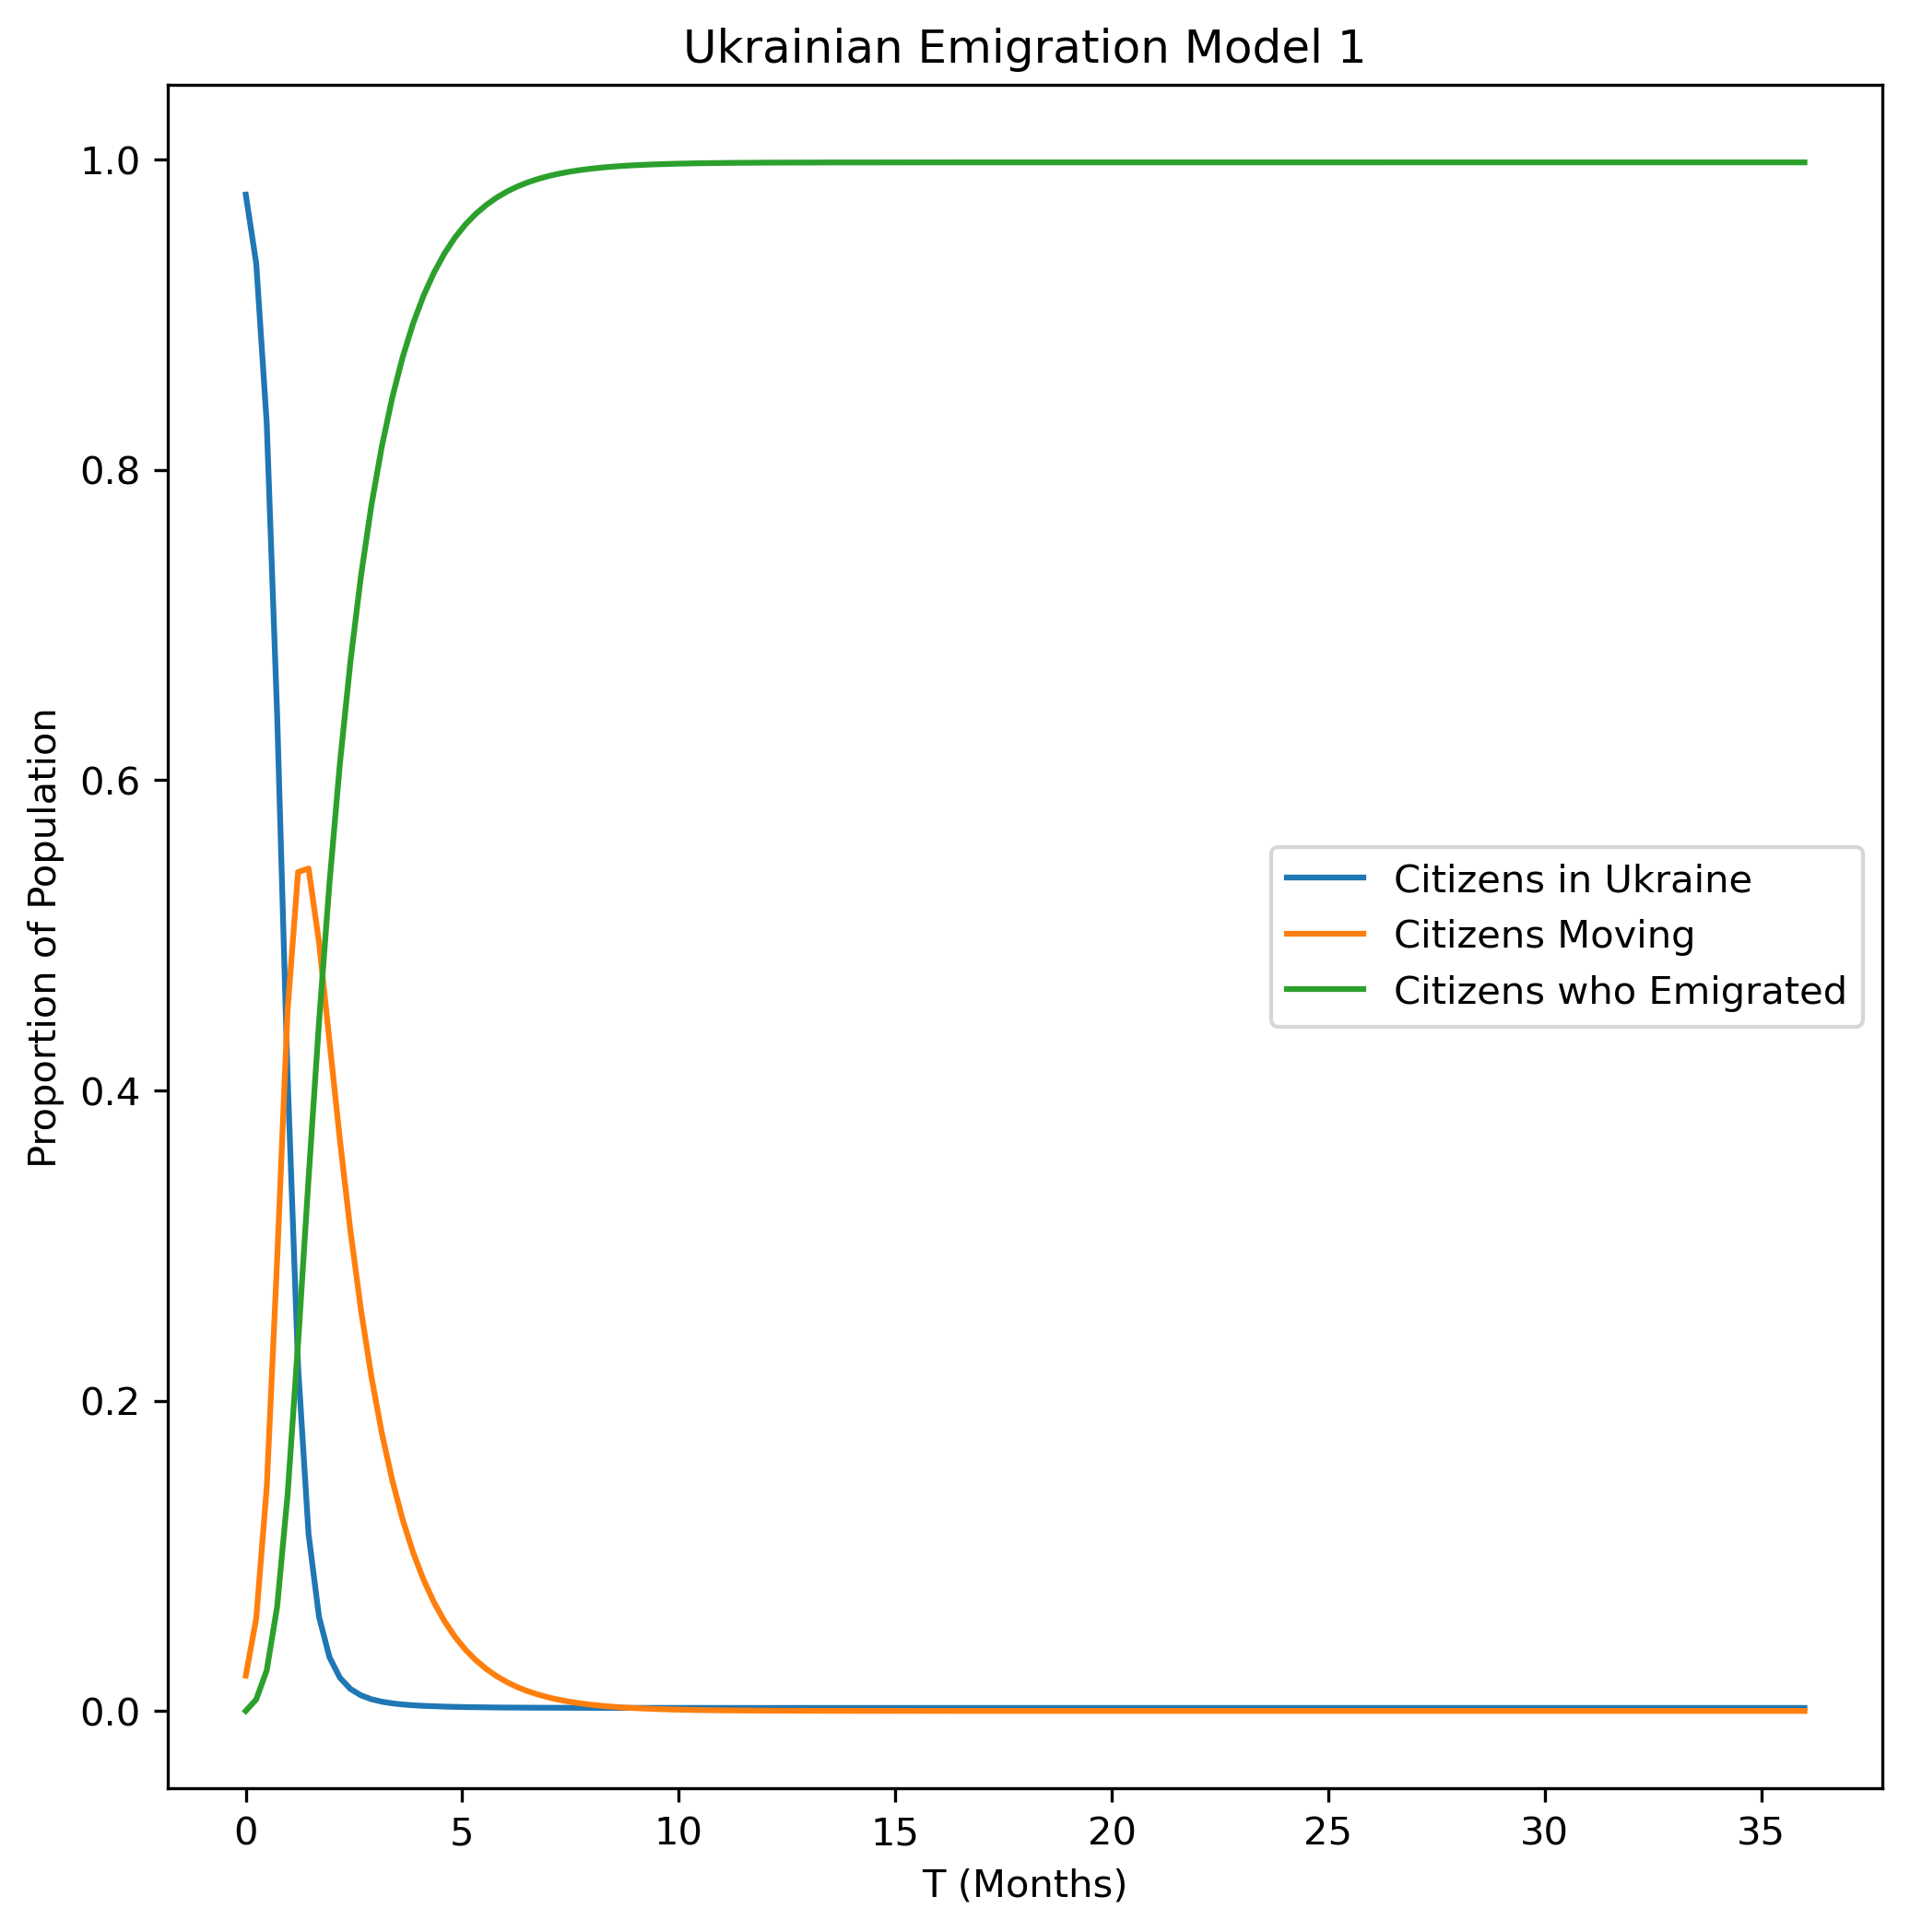

In [26]:
prob1()


In [38]:
def prob2():
    '''
    Using the SIR model, model the spread of a disease in a city
    of 3 million people where there are initially 5 infected
    people.

    1. Plot the results
    2. Find the number of people still able to work at peak infection
    '''
    t0 = 0 
    tf = 36
    n = 44000000
    beta = 5
    gamma = 1/1.25
    birth = (8.6/1000)/12
    death = (18.5/1000)/12

    # define the ode system as given in the problem
    def ode(t,y):
        return np.array([-beta*y[0]*y[1]+birth*y[0]-death*y[0], beta*y[0]*y[1]-gamma*y[1],gamma*y[1]])
    
    # define the initial conditions
    y0 = np.array([(n-1000000)/n,1000000/n,0])
    # solve the system
    sol = solve_ivp(ode, (t0,tf), y0, t_eval=np.linspace(t0, tf, 150))
    
    # Plot the system and label/title everything
    plt.figure(figsize=(8, 8), dpi=300)
    plt.plot(sol.t,sol.y[0],label='Citizens in Ukraine')
    plt.plot(sol.t,sol.y[1],label='Citizens Moving')
    plt.plot(sol.t,sol.y[2],label='Citizens who Emigrated')
    plt.xlabel('T (Months)')
    plt.ylabel('Proportion of Population')
    plt.title('Ukrainian Emigration Model 2')
    plt.legend()
    plt.show()

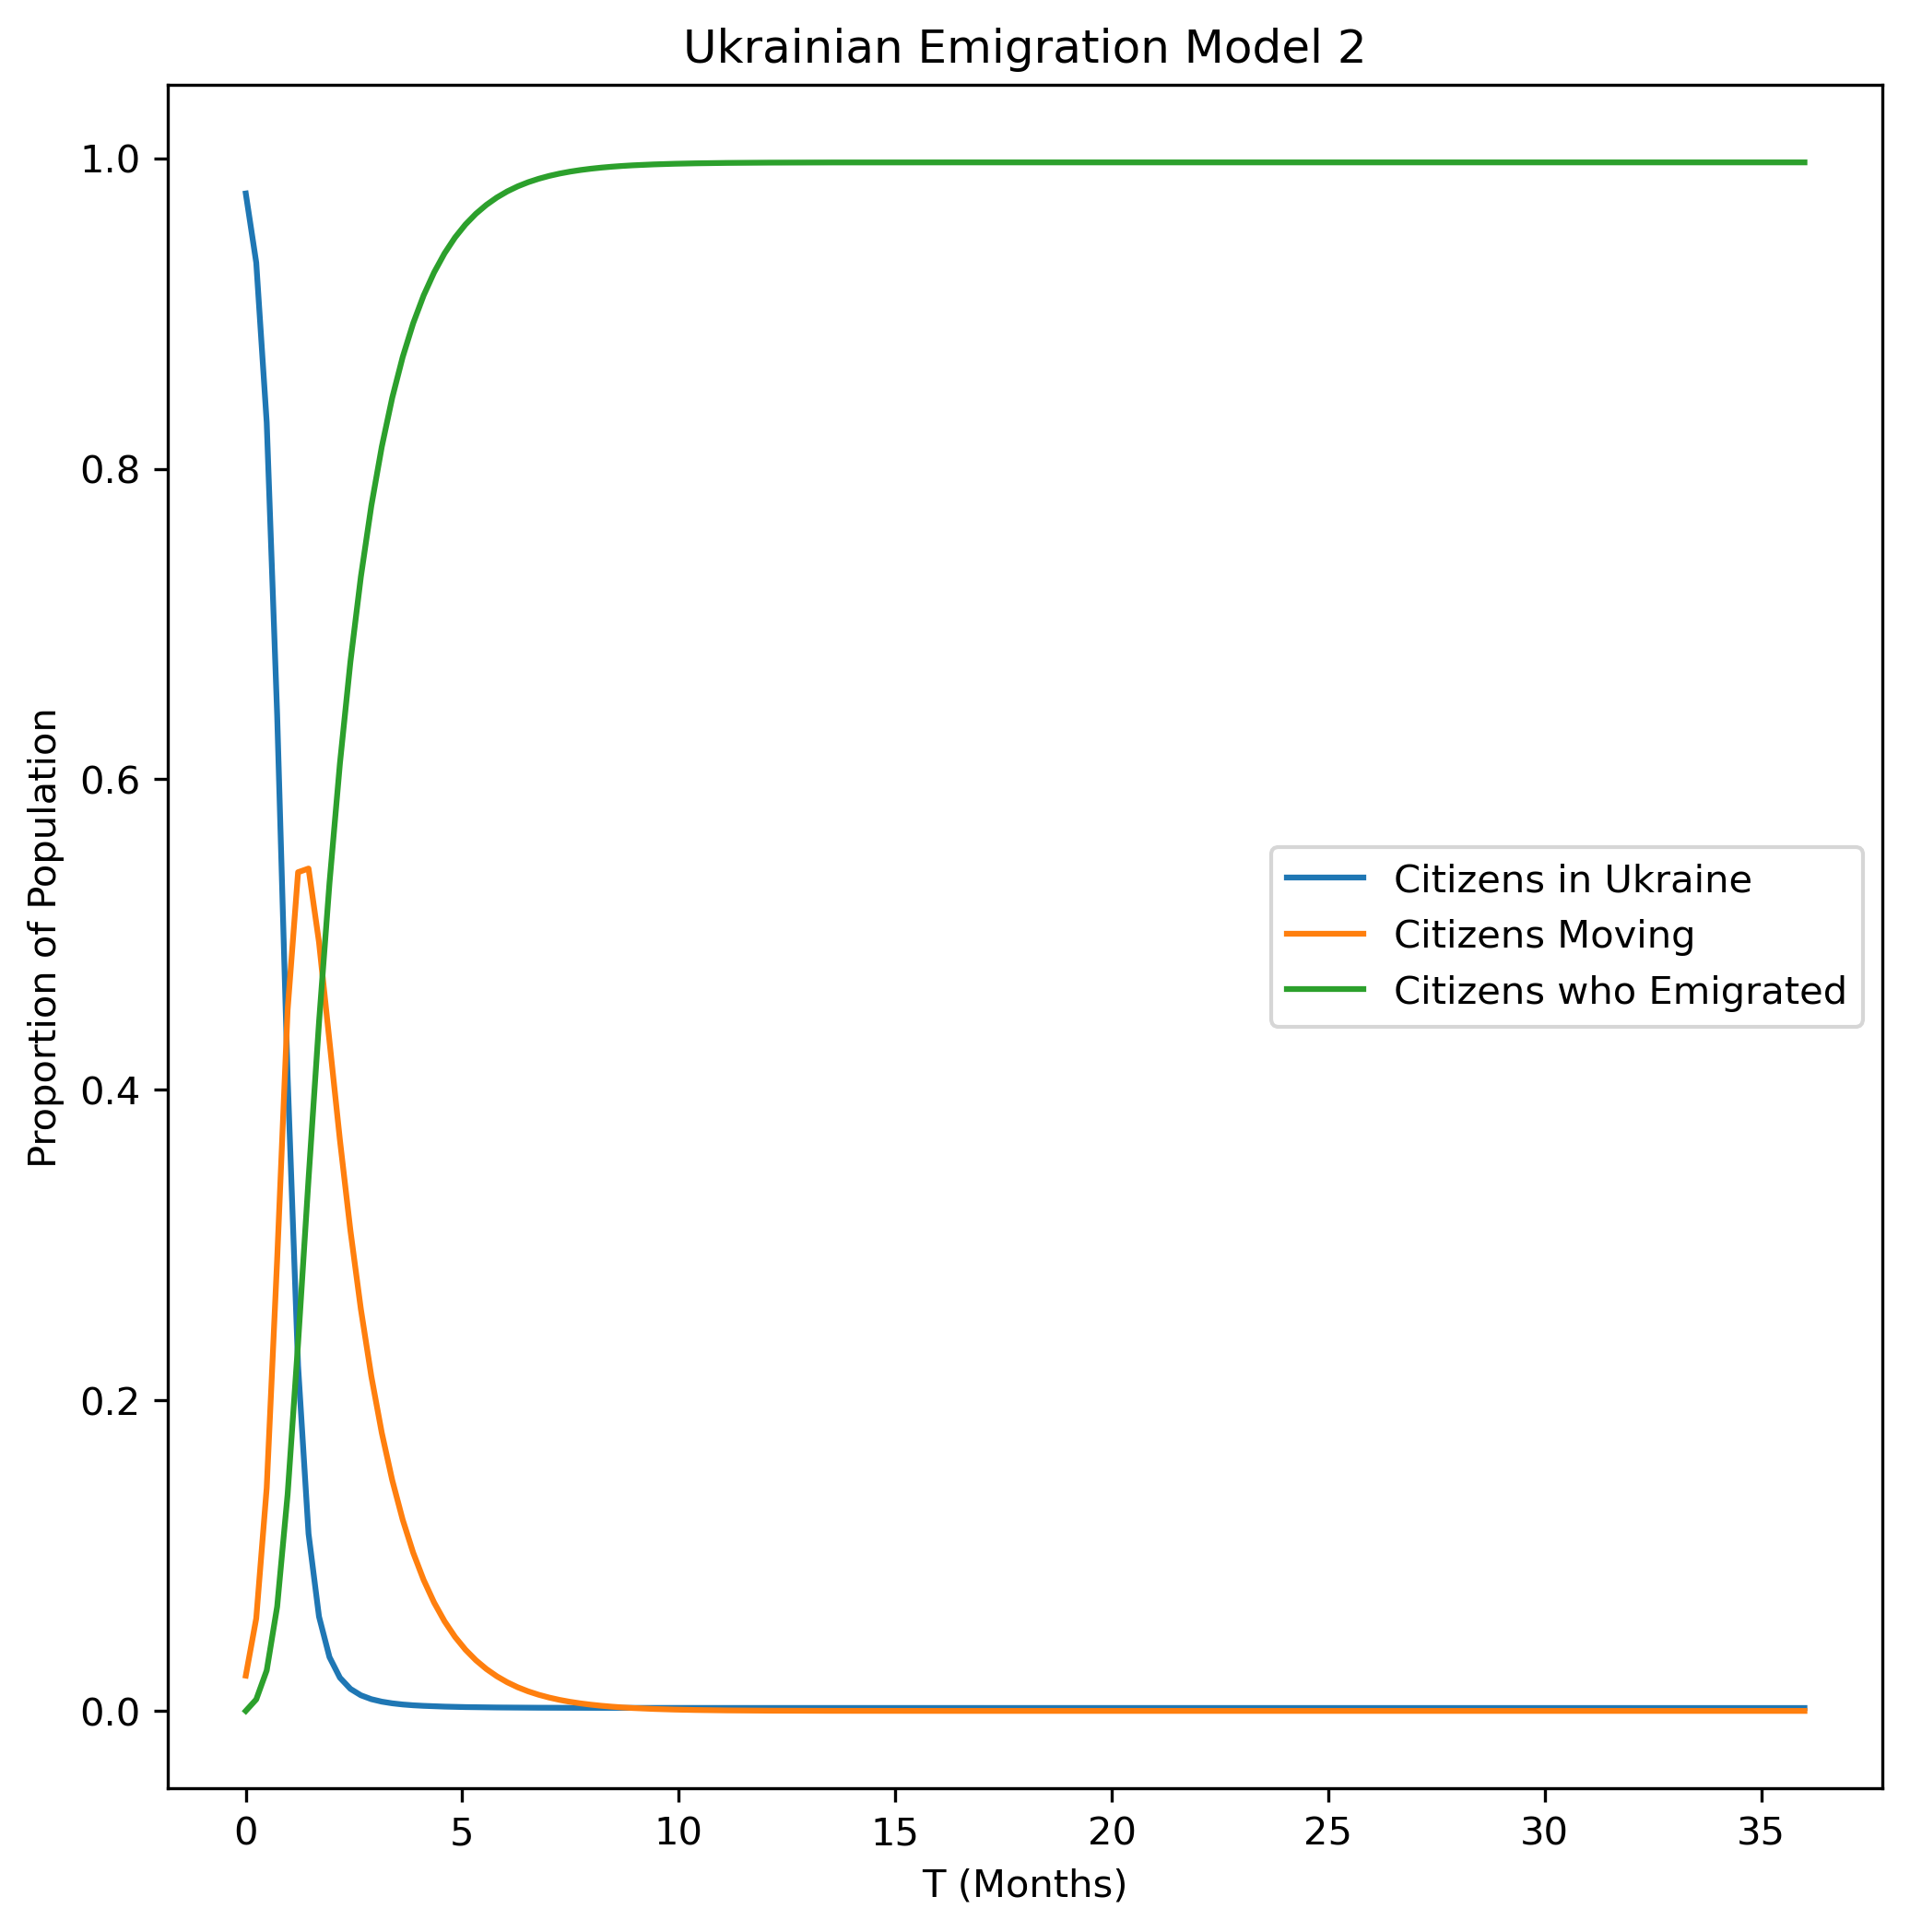

In [39]:
prob2()

In [40]:
def prob3():
    beta = 5
    gamma = 1/1.25
    k=.6
    n = 44000000
    #define ode measuring the spread of disease
    def ode(t,y): 
        return np.array([beta*y[1]*(1-y[0]/k),-beta*y[1]*(1-y[0]/k)-gamma*y[1], gamma*y[1]])
    #t vals
    t0=0
    tf=36
    #initial conditions
    # y0=np.array([1,5/(3e6),0])
    y0 = np.array([(n-1000000)/n,1000000/n,0])
    #solve ivp and get solution
    sol=solve_ivp(ode,(t0,tf), y0, t_eval=np.linspace(t0,tf,150))
    #plots and labels
    plt.figure(figsize=(8, 8), dpi=300)
    plt.plot(sol.t,sol.y[0],label='Citizens in Ukraine')
    plt.plot(sol.t,sol.y[1],label='Citizens Moving')
    plt.plot(sol.t,sol.y[2],label='Citizens who Emigrated')
    plt.xlabel('T (Months)')
    plt.ylabel('Proportion of Population')
    plt.title('Ukrainian Emigration Model 3')
    plt.legend()
    plt.show()

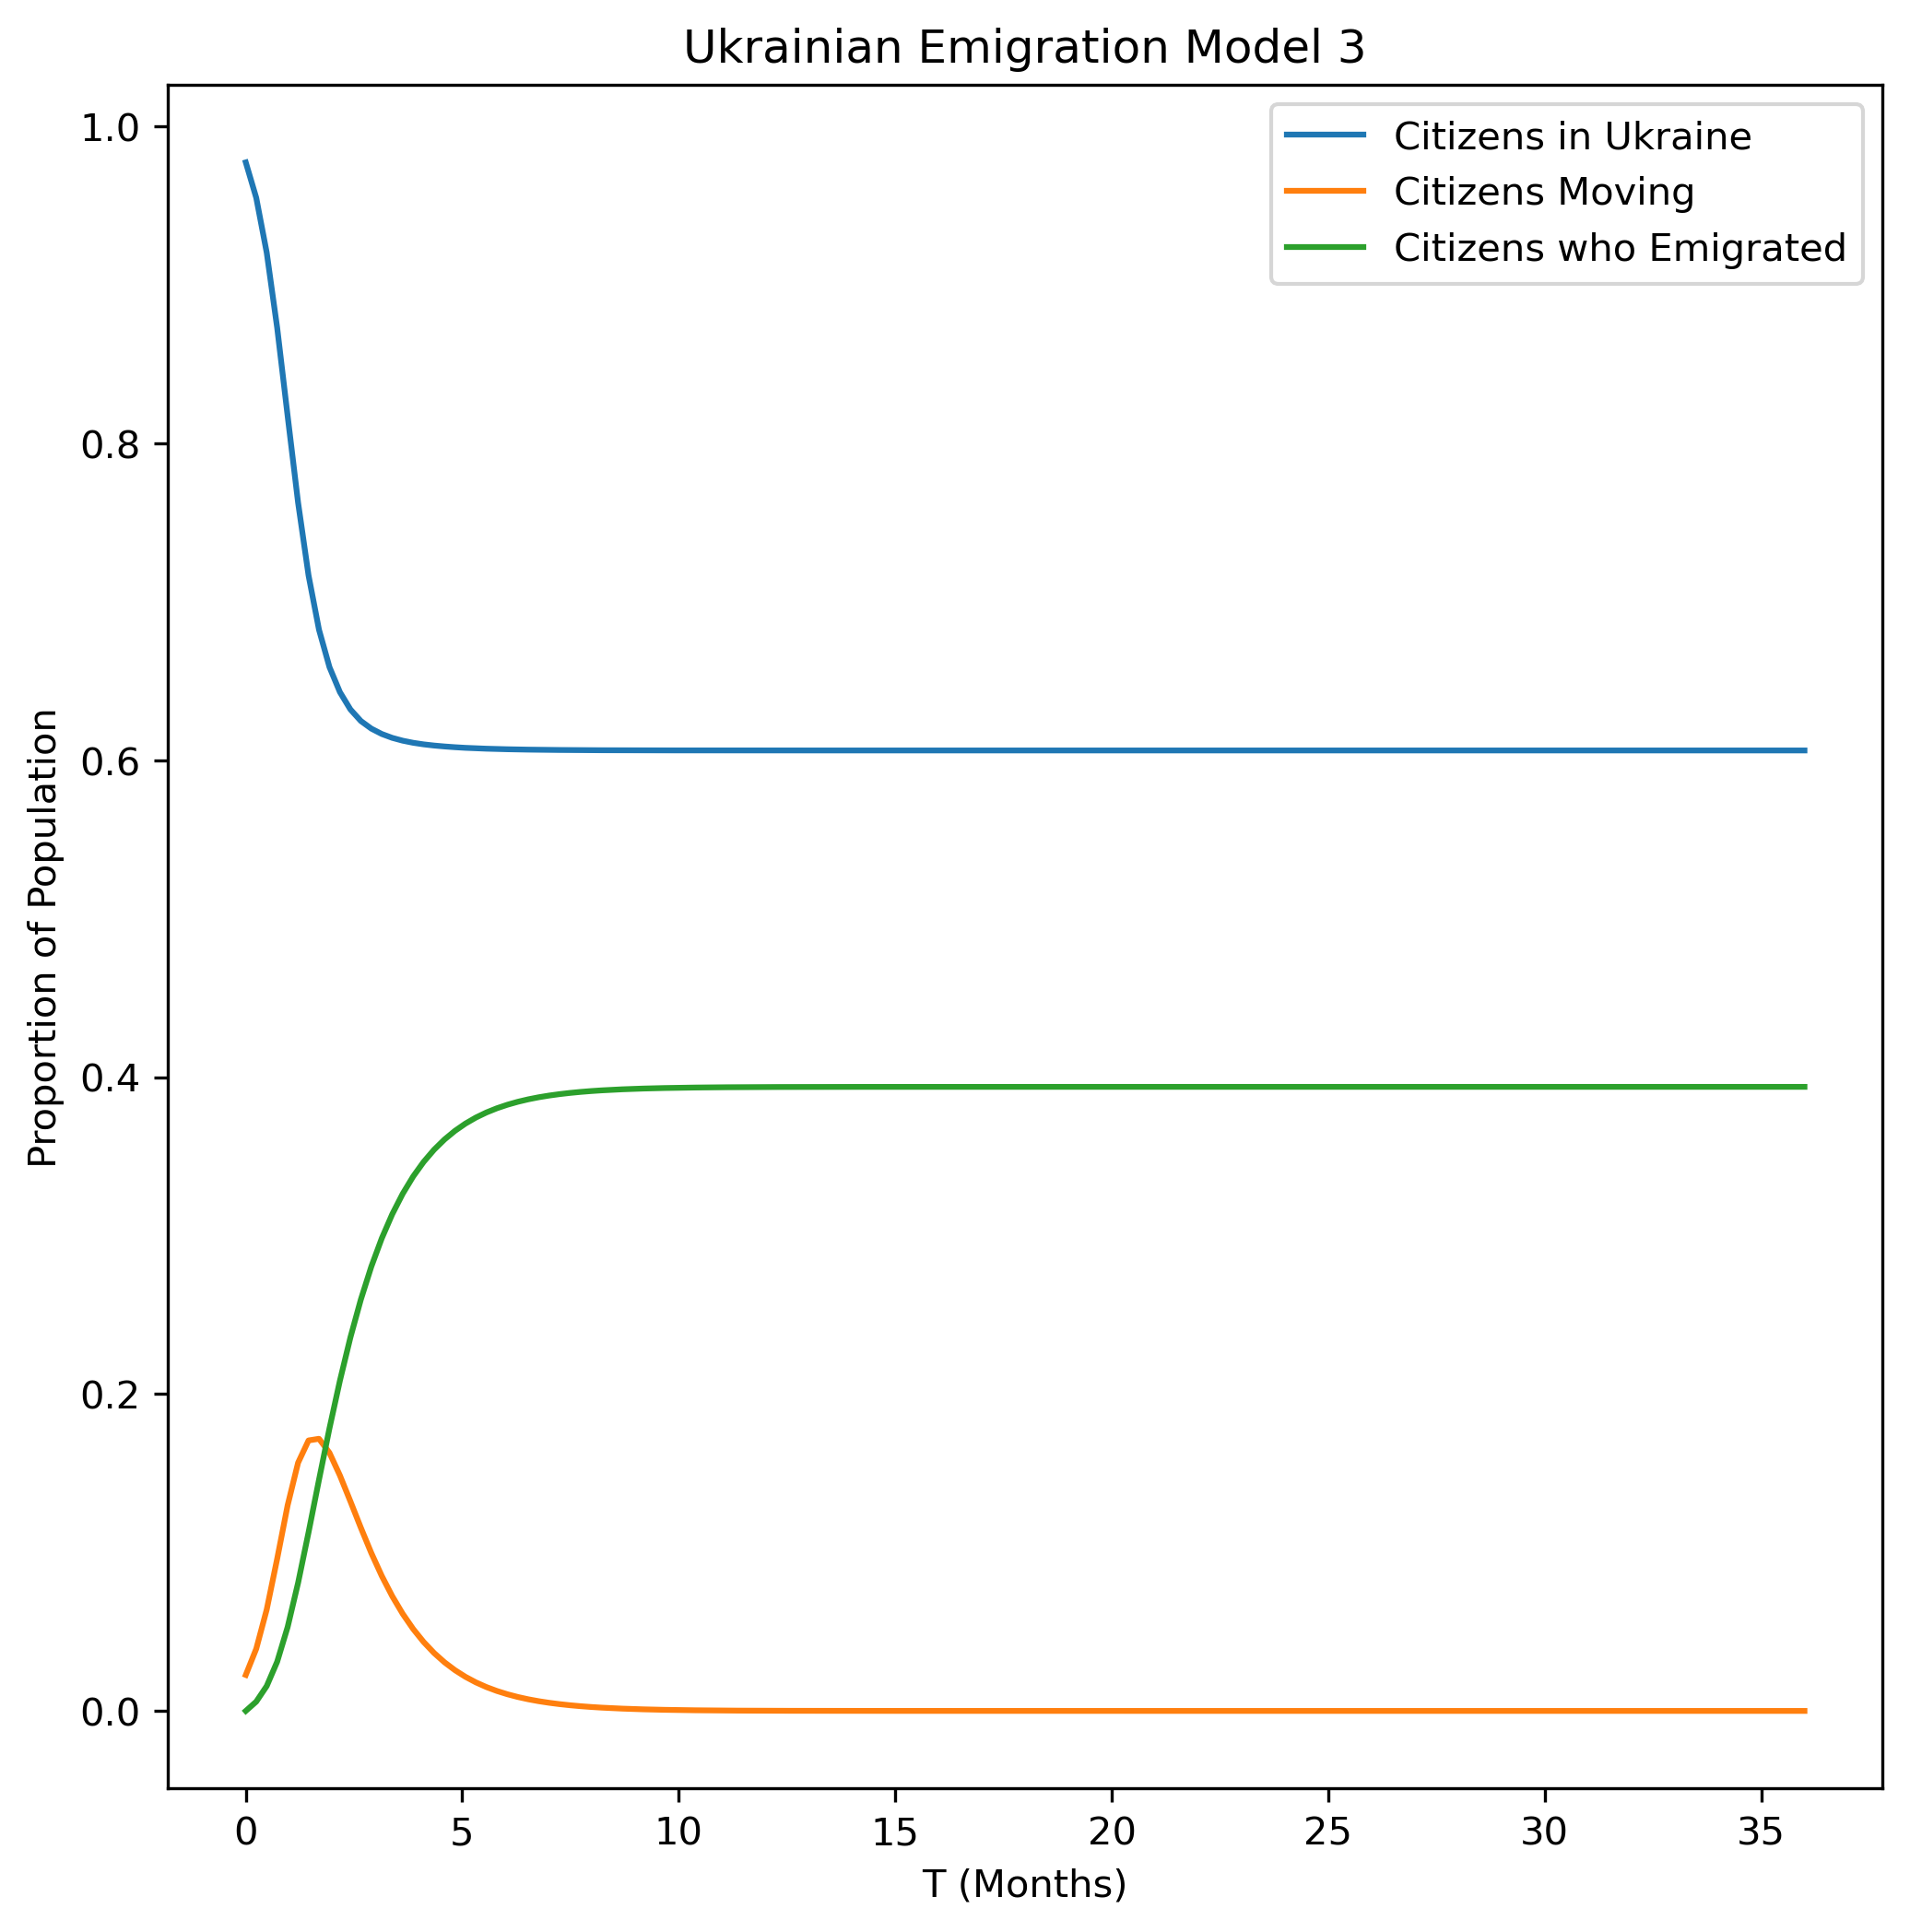

In [41]:
prob3()

In [35]:
def prob4():
    t0 = 0 
    tf = 36
    n = 44e6
    beta=5
    gamma=1/1.25
    k = 29e6/n
    c = 60e5/n
    #define ode measuring the spread of disease
    def ode(t,y): 
        if t <3:
            return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1],0])
        else:
            return np.array([beta*y[1]*y[0]*(1-y[0]/k),-beta*y[1]*y[0]*(1-y[0]/k)-gamma*y[1], gamma*y[1] - c * y[2],c * y[2]])
    #initial conditions
    y0 = np.array([(n-1e6)/n,1e6/n,0, 0])
    y0[3] = min(y0[3], 1 - y0[0])

    #solve ivp and get solution
    solution=solve_ivp(ode,(t0,tf), y0, t_eval=np.linspace(t0,tf,150))

    #plots and labels
    plt.figure(figsize=(8, 8), dpi=300)
    plt.plot(solution.t, solution.y[0]+solution.y[3],label="Citizens in Ukraine")
    plt.plot(solution.t, solution.y[1],label="Citizens Moving")
    plt.plot(solution.t, solution.y[2],'green',label="Citizens out of the Country")
    # plt.plot(solution.t, solution.y[3],'purple',label="Returned to Ukraine")
    plt.xlabel('T (Months)')
    plt.title('Ukraine Emigration Model 4')
    plt.ylabel('Proportion of Population')
    plt.legend()
    plt.show()

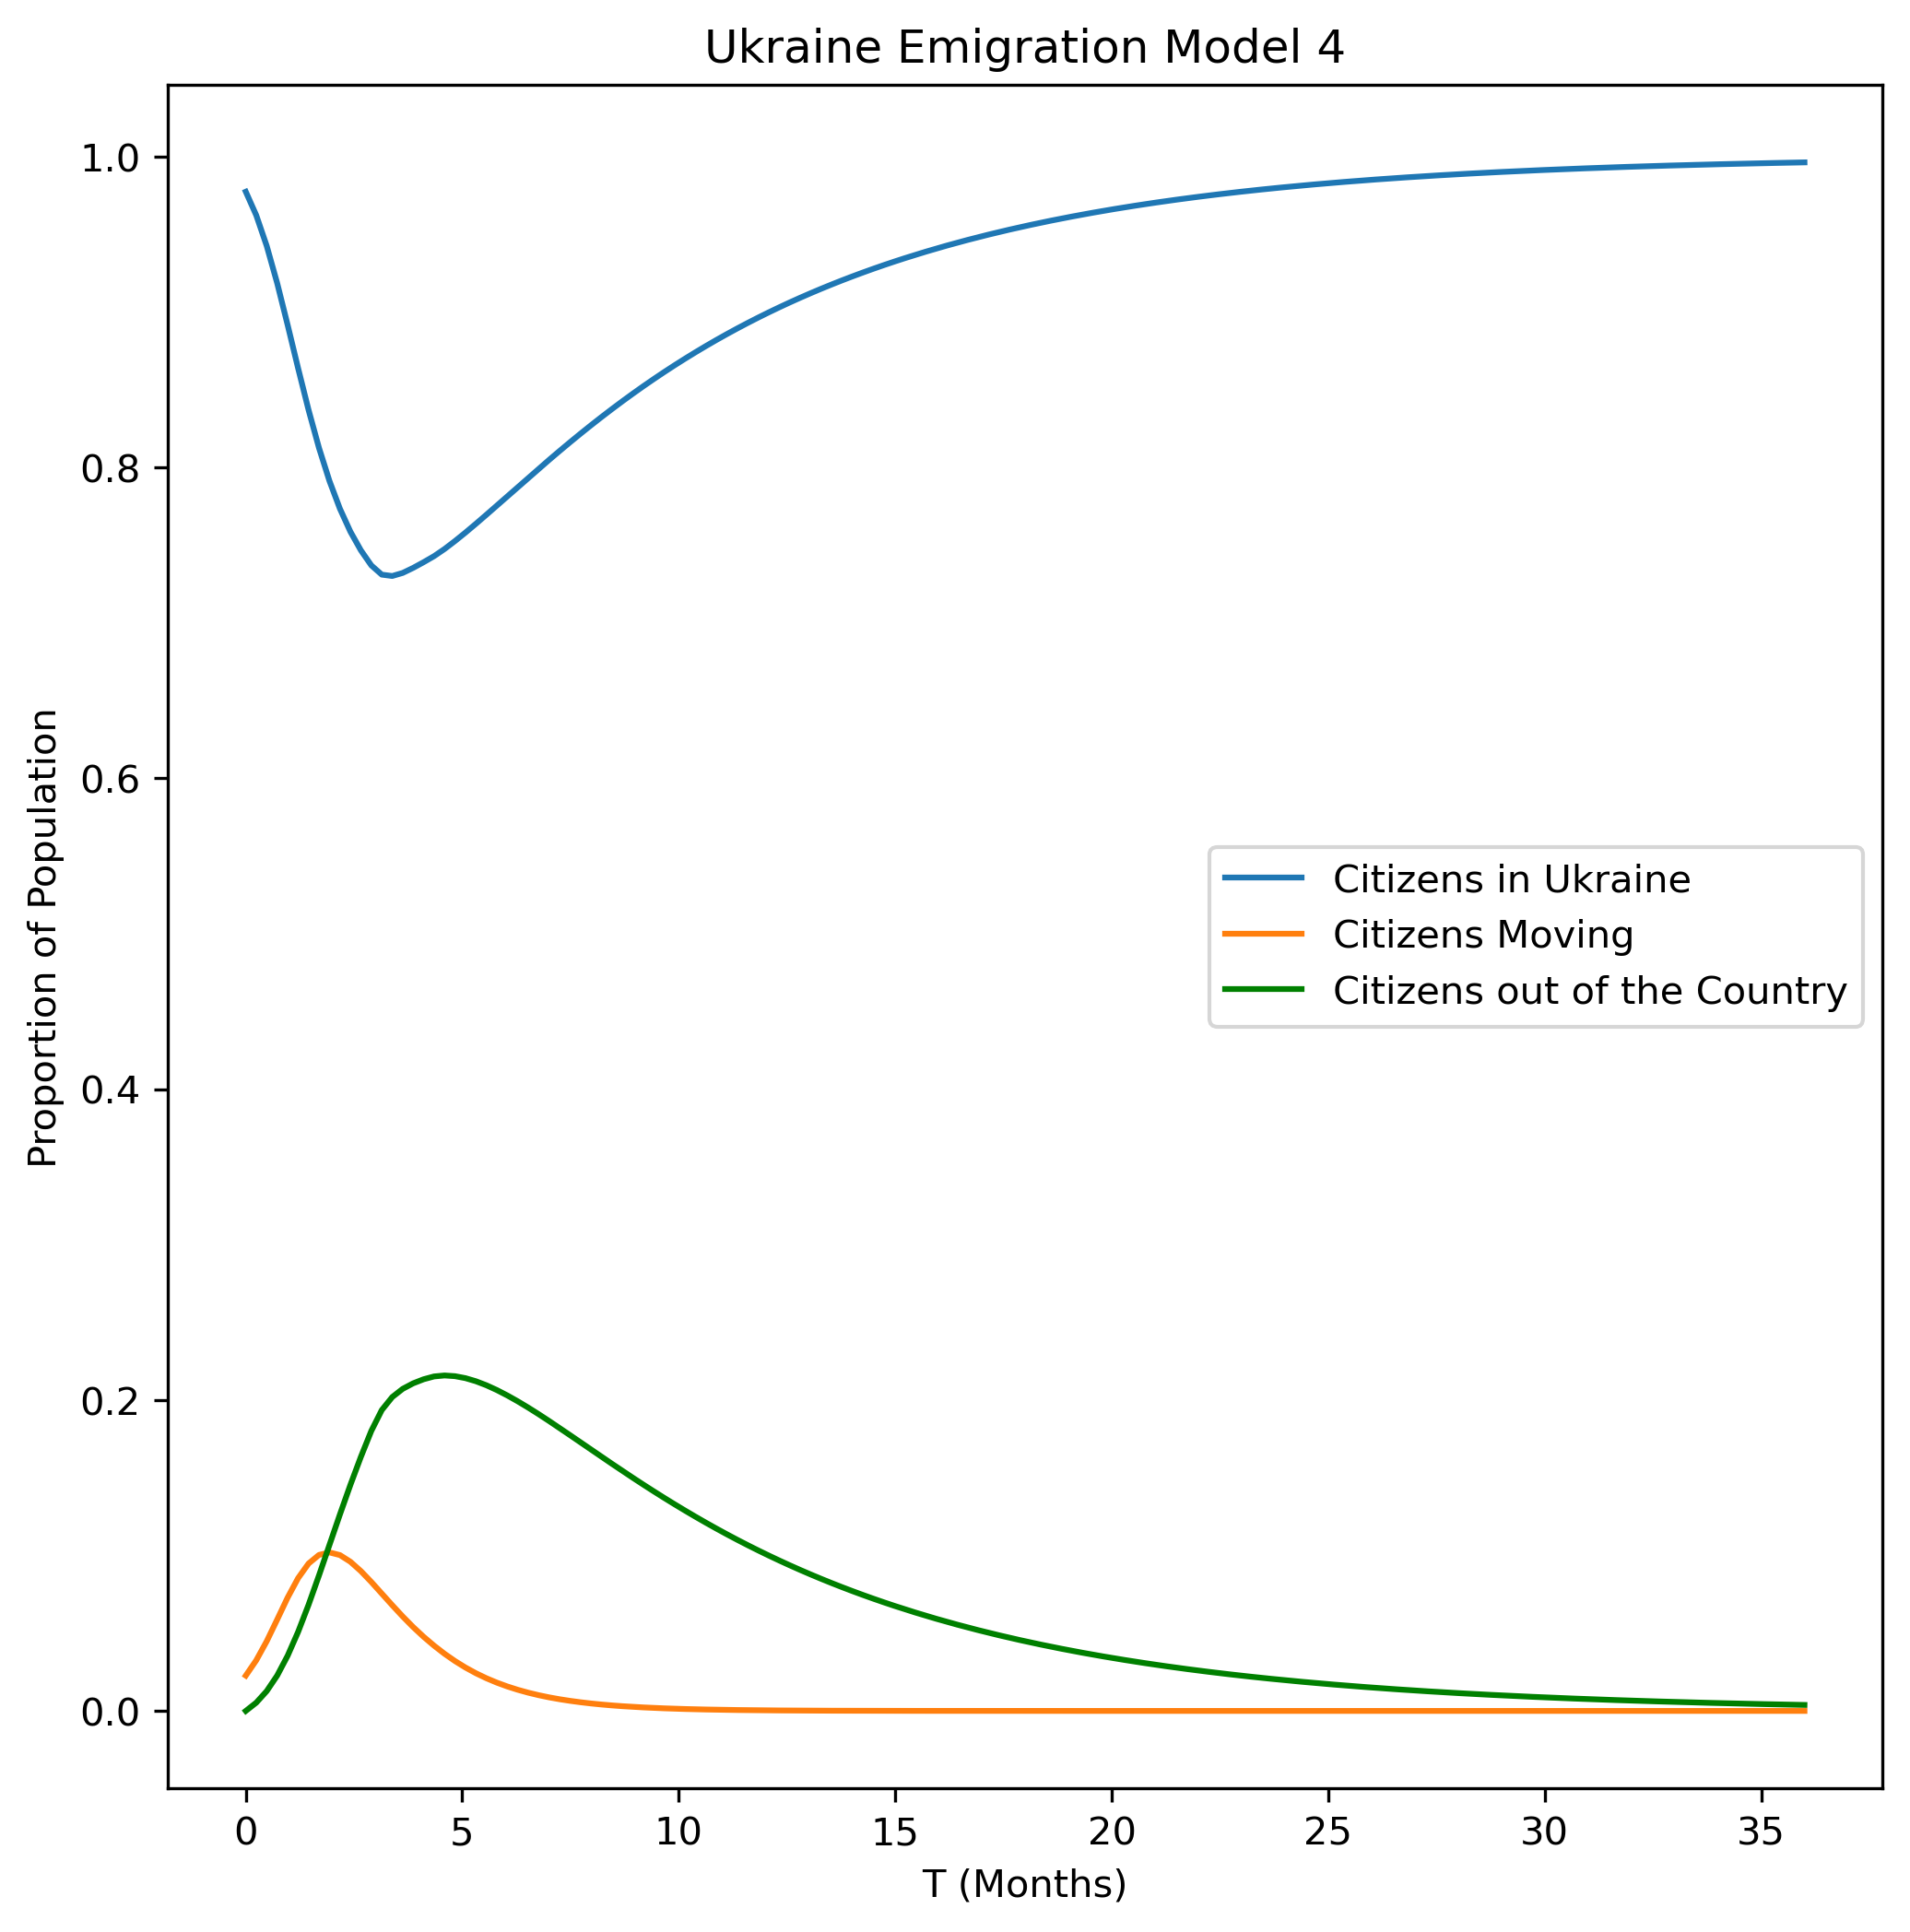

In [36]:
prob4()